## Overview

Previous exploratory data analsysis using LDA to classify mean intensity of voxels as on a synapse or not on a synapse showed that PSD95 and NR1 channel can be used to classify the voxels with > 0.95 accuracy. LDA is chosen as LDA can classify voxels in collman15v2 better than QDA can. Use PSD95 and NR1 to create a feature map that can be used for a future synapse detection pipleline.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from skimage.measure import block_reduce

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold

In [2]:
#Load data
collman15v2 = pd.read_csv('../exploratory_data_analysis/data/collman15v2.csv')
collman14v2 = pd.read_csv('../exploratory_data_analysis/data/collman14v2.csv')

In [3]:
# Get rid of annotations missing fluorescent data
collman14v2 = collman14v2[collman14v2.total != 0]

In [4]:
#Columns we care about
columns = ['NR1', 'PSD', 'location']

In [5]:
#Create new dataframes using columns above
collman15v2 = collman15v2[columns]
collman14v2 = collman14v2[columns]

In [6]:
collman15v2_data = np.load('../data/collman15v2_reduced.npz')

In [7]:
annotation = block_reduce(np.load('../data/collman15v2.npz')['annotation'], (1, 36, 36), np.max)

In [8]:
psd95 = collman15v2_data['PSD95_488']
nr1 = collman15v2_data['NR1594']
psd95.shape == nr1.shape

True

In [9]:
data_shape = psd95.shape
data_shape

(27, 126, 176)

Begin LDA analysis on PSD95 and NR1 by training Collman14v2 data and apply to collman15v2 data

In [10]:
lda = LinearDiscriminantAnalysis()
skf = StratifiedKFold(random_state=np.random.RandomState())

In [11]:
X = collman14v2.iloc[:, :2].values
y = collman14v2.iloc[:, -1].values

In [12]:
splits = list(skf.split(X, y))
train = [item[0] for item in splits]
test = [item[1] for item in splits]

In [13]:
lda.fit(X[train[0]], y[train[0]])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
feature_map = np.stack((nr1.ravel(), psd95.ravel()), axis=1)

In [15]:
feature_map = lda.predict_proba(feature_map)

/Users/jaewonc78/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [16]:
feature_map = feature_map[:, 0].reshape(data_shape) #Class = 0 on a synapse

In [17]:
np.save('feature_map_psd_nr', feature_map)

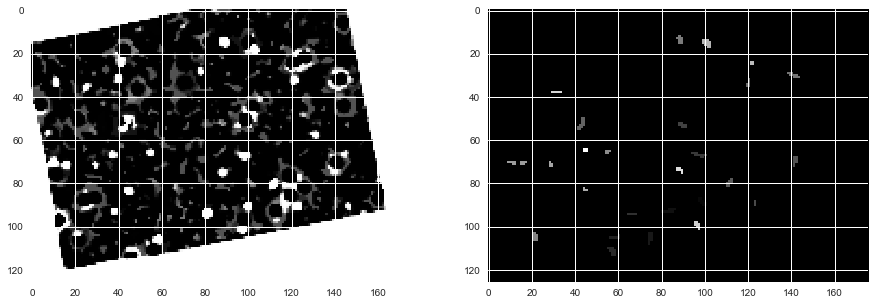

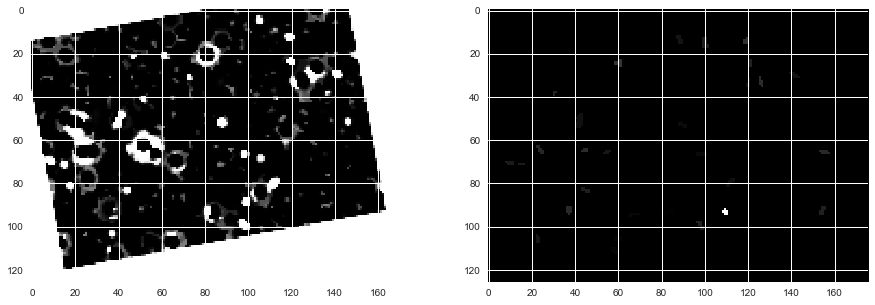

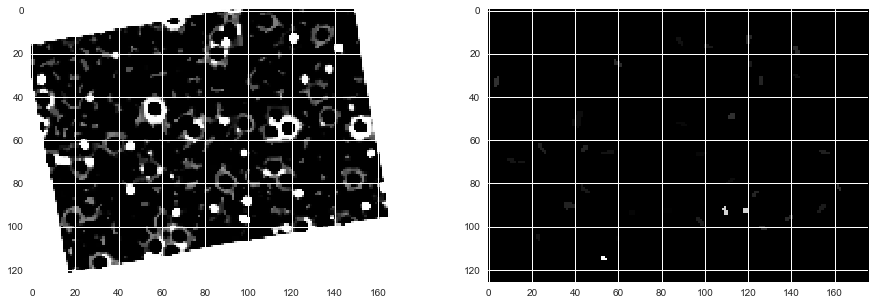

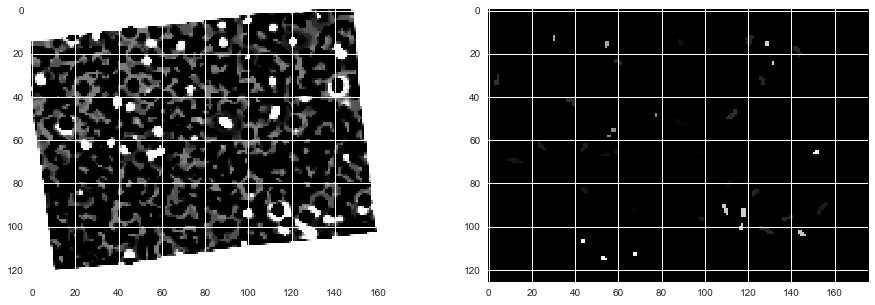

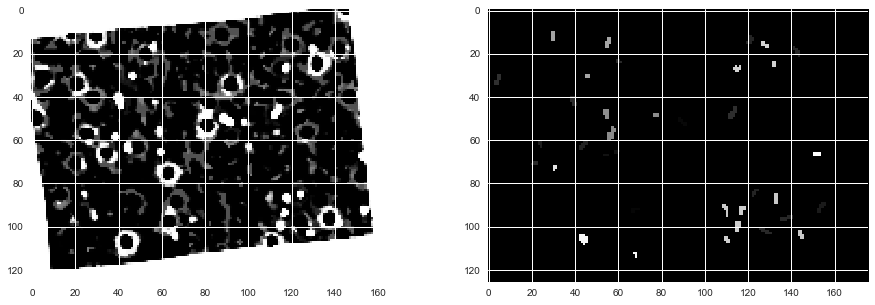

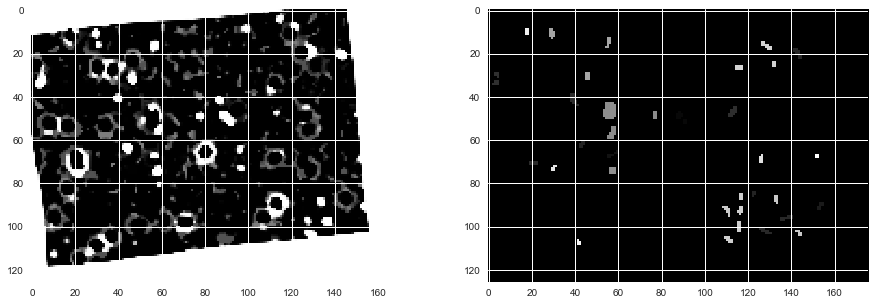

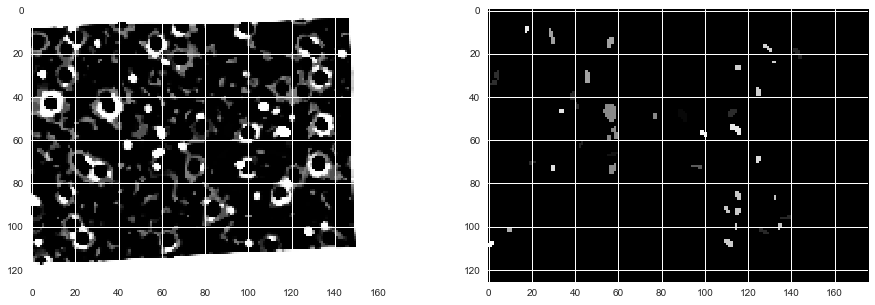

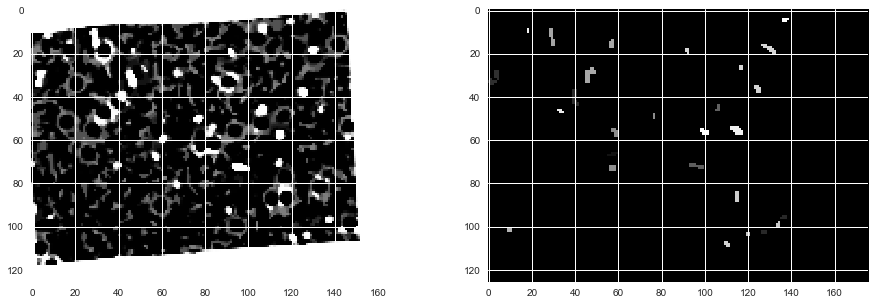

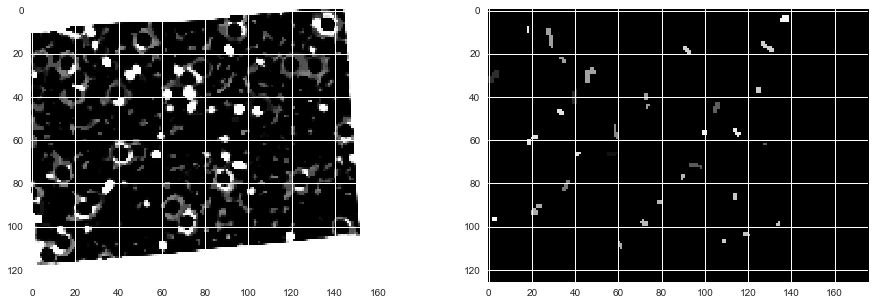

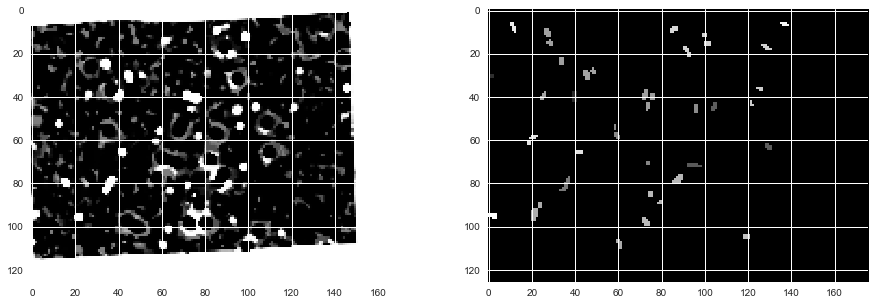

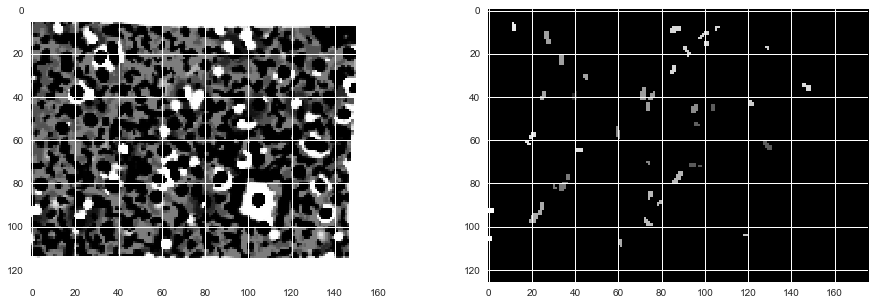

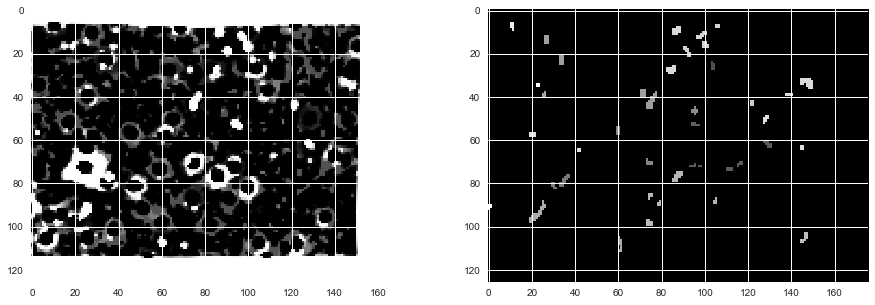

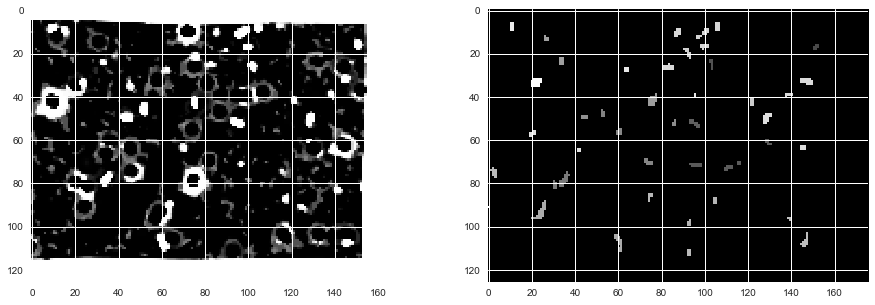

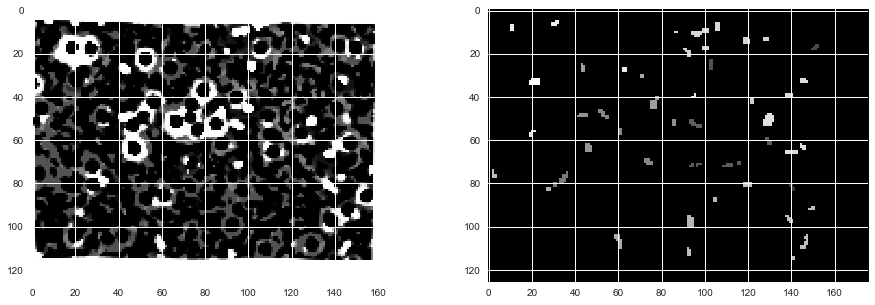

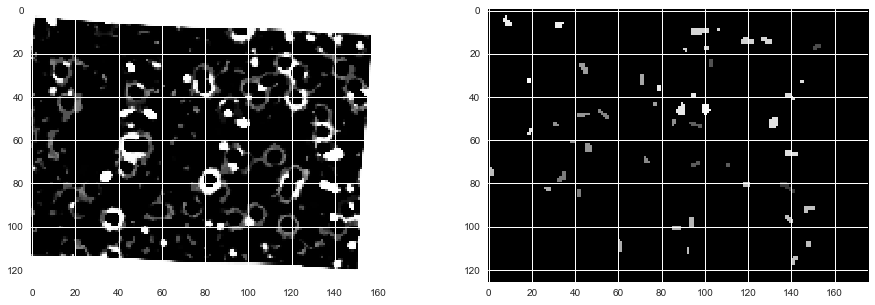

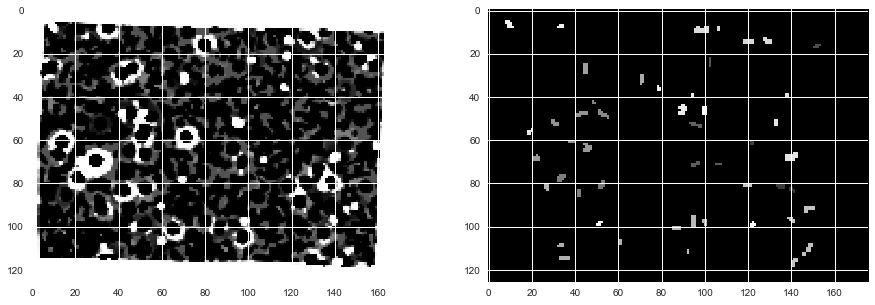

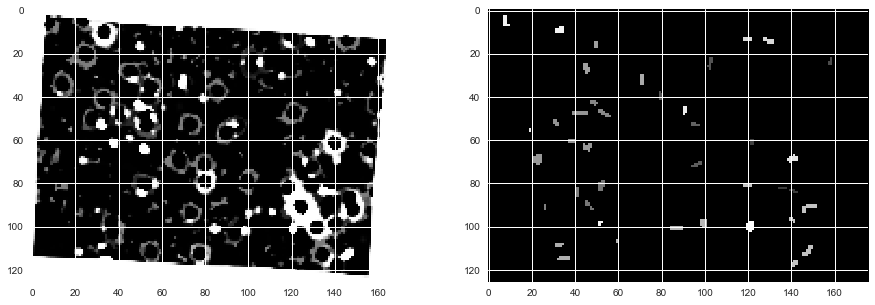

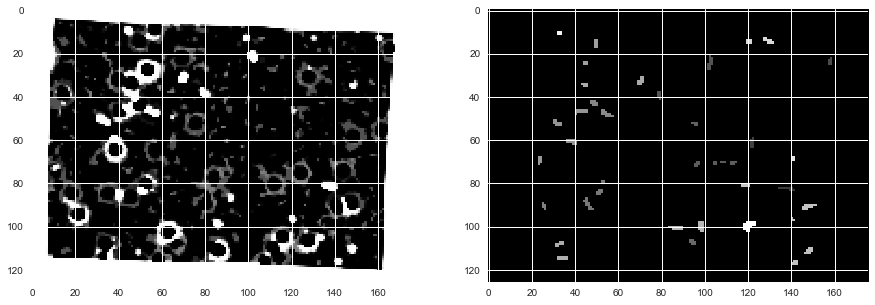

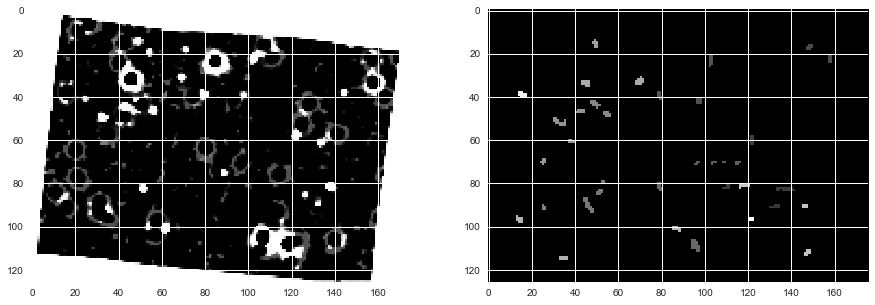

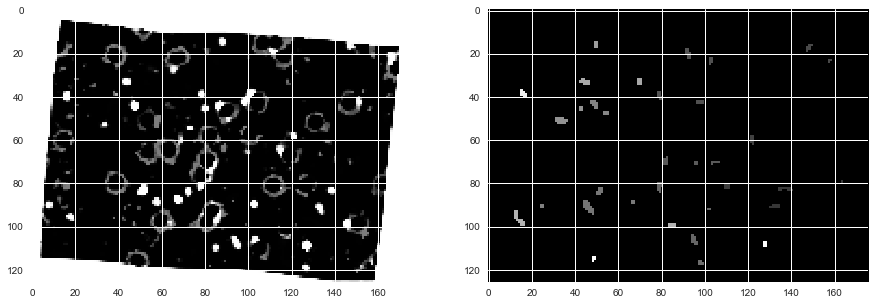

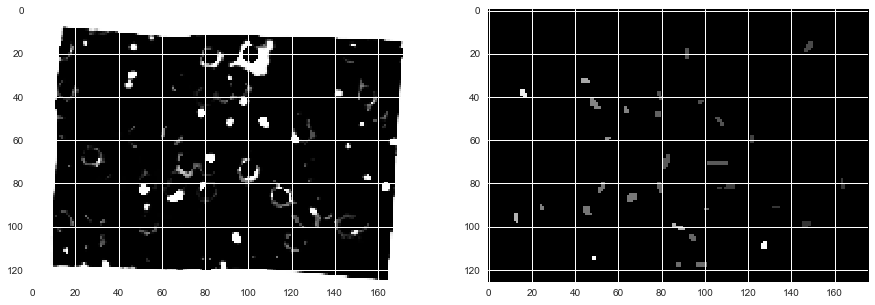

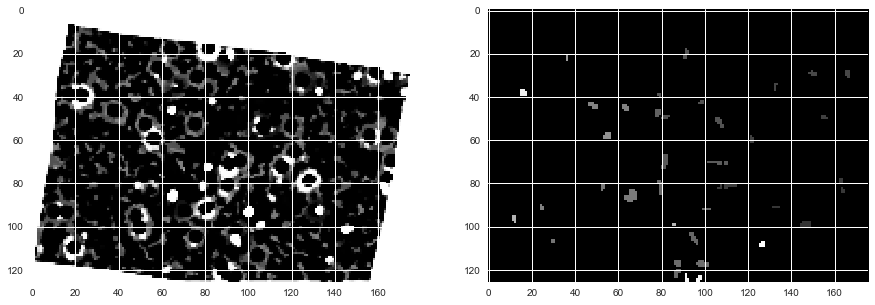

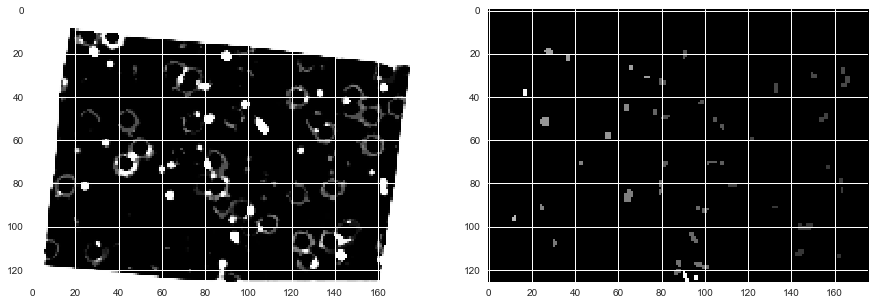

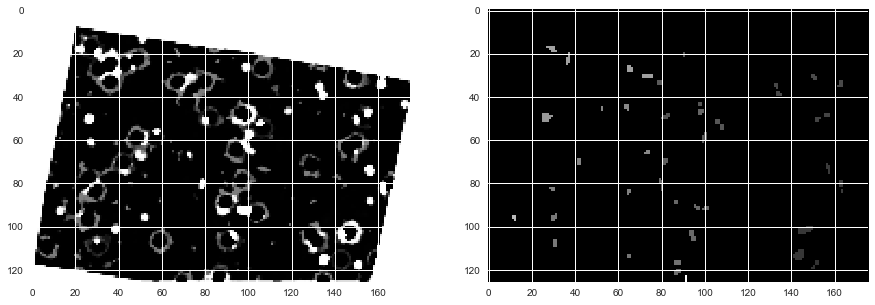

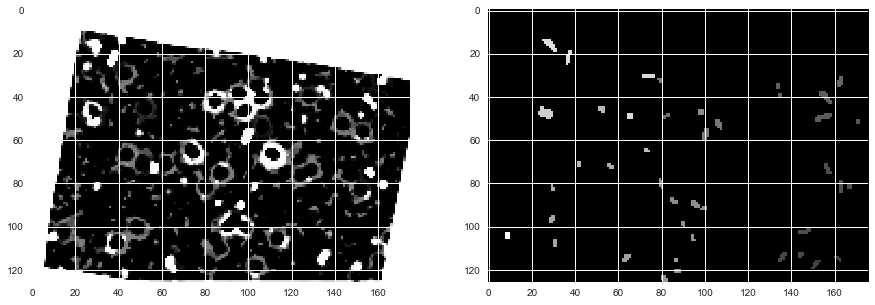

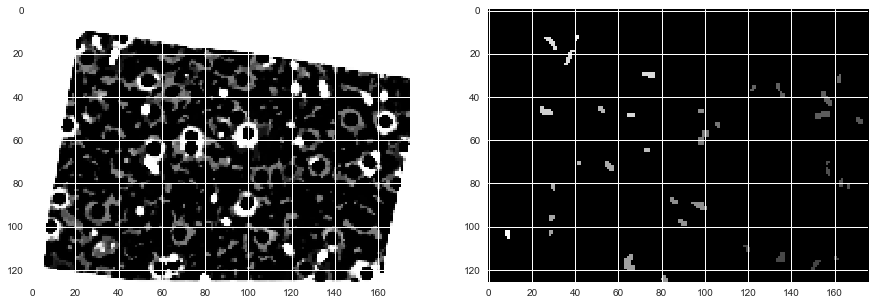

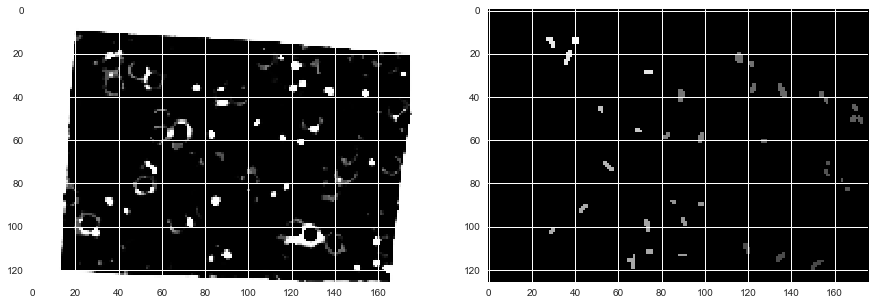

In [20]:
for i, _ in enumerate(feature_map):
    plt.figure(figsize=(15,8))

    plt.subplot(121)
    plt.imshow(feature_map[i])
    
    plt.subplot(122)
    plt.imshow(annotation[i], cmap='gray')
    
    plt.show()

In [19]:
plt.close('all')